### 9.3 Comparing minimization functions for Rosenbrock Functions (3.0 points)
The [Rosenbrock function](https://en.wikipedia.org/wiki/Rosenbrock_function) is a non-convex function that is often used as a test problem for optimization algorithms. It has a global minimum of 0 at the point (1, 1). The function is defined by:
$$f(x, y) =  (a - x)^2 + b(y - x^2)^2$$
where he parameter $a$ determines the location of the global minimum and the parameter $b$ determines the steepness of the valley around the minimum. We will be using the Rosenbrock function to visualize some of Pytorch's built-in optimization algorithms. Implement the Rosenbrock function in Python.

In [1]:
import numpy as np
import matplotlib.pyplot as pt
from matplotlib.colors import LogNorm
from typing import List

In [2]:
def rosenbrock(x):
    return (1 - x[0]) ** 2 + 100 * (x[1] - x[0] ** 2) ** 2

#### Plotting Rosenbrock function

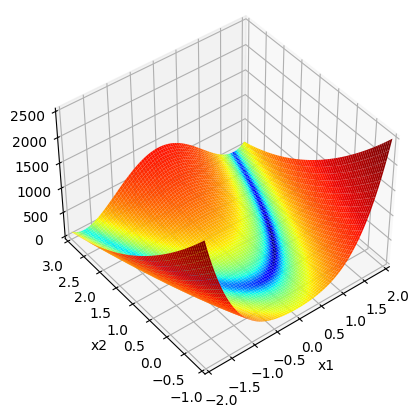

In [3]:
fig = pt.figure()
ax = fig.add_subplot(projection="3d", azim=-128, elev=43)
s = 0.05
X = np.arange(-2, 2.0 + s, s)
Y = np.arange(-1, 3.0 + s, s)
xmesh, ymesh = np.meshgrid(X, Y)
fmesh = rosenbrock(np.array([xmesh, ymesh]))
ax.plot_surface(
    xmesh,
    ymesh,
    fmesh,
    rstride=1,
    cstride=1,
    norm=LogNorm(),
    linewidth=0,
    edgecolor="none",
    cmap="jet",
)

# Set the axis limits so that they are the same as in the figure above.
ax.set_xlim([-2, 2.0])
ax.set_ylim([-1, 3.0])

pt.xlabel("x1")
pt.ylabel("x2")
pt.show()

Text(0, 0.5, 'x2')

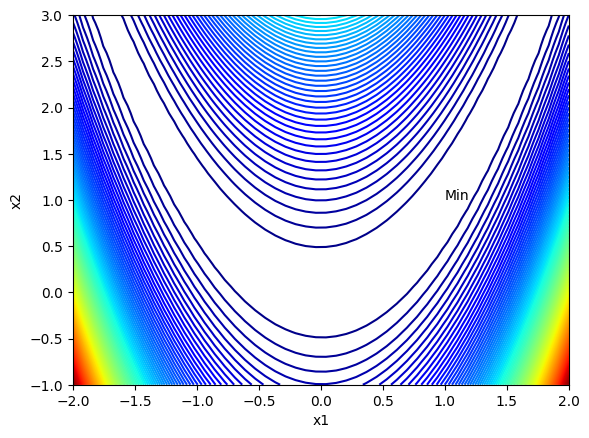

In [4]:
xmesh, ymesh = np.mgrid[-2:2:50j, -1:3:50j]
fmesh = rosenbrock(np.array([xmesh, ymesh]))
pt.axis("auto")
pt.contour(xmesh, ymesh, fmesh, 100, cmap="jet")
pt.annotate("Min", (1, 1))
pt.xlabel("x1")
pt.ylabel("x2")

#### Implementing optimizers

In [ ]:
starting_point = np.array([-0.5, 2.5])

In [5]:
def visualize_trajectory(trajectory: List[float]):
    print(f"Num of iterations: {len(trajectory)}")
    xmesh, ymesh = np.mgrid[
        np.min(trajectory) - 1 : np.max(trajectory) + 1 : 50j,
        np.min(trajectory) - 1 : np.max(trajectory) + 1 : 50j,
    ]
    fmesh = rosenbrock(np.array([xmesh, ymesh]))
    pt.axis("auto")
    pt.contour(xmesh, ymesh, fmesh, int(100 * np.max(trajectory) / 3), cmap="jet")
    array = np.array(trajectory)

    pt.plot(array.T[0], array.T[1], "r--")
    pt.annotate(
        "Initial",
        (array[0][0], array[0][1]),
        xytext=(3, 3),
        arrowprops=dict(facecolor="white", shrink=0.05),
    )
    pt.annotate(
        "Final",
        (array[len(array) - 1][0], array[len(array) - 1][1]),
        xytext=(0.5, 2),
        arrowprops=dict(facecolor="white", shrink=0.05),
    )
    pt.colorbar()
    print(
        "Min of the function is at:"
        + str((array[len(array) - 1][0], array[len(array) - 1][1]))
    )

**Implement gradient function for rosenbrock function.**

In [6]:
def gradient(x):
    raise NotImplementedError()

#### SGD with Momentum
**Implement SGD with momentum method that returns the trajectory of the gradient descent.**
**Experiment with different values of momentum and learning rate explian your findings with the help of visualizations**

In [7]:
def sgd_with_momentum(starting_point, lr, momentum=0.9, episolon=0.001) -> List[float]:
    raise NotImplementedError()

In [ ]:
lr = 1e-3

trajectory = sgd_with_momentum(starting_point, lr)
visualize_trajectory(trajectory)

#### RMSProp
**Implement RMSprop method that returns the trajectory of the gradient descent.**
**Experiment with different values of beta for RMSProp and explian your findings with the help of visualizations**

In [15]:
def rmsprop(starting_point, lr=0.001, beta=0.9, epsilon=1e-8, max_iters=1e5):
    raise NotImplementedError()

In [ ]:
lr = 1e-3

trajectory = rmsprop(starting_point, lr)
visualize_trajectory(trajectory)

#### AdaGrad
**Implement AdaGrad method that returns the trajectory of the gradient descent.**
**Experiment with different values of learning rate and explian your findings with the help of visualizations**

In [9]:
def adagrad(starting_point, lr=0.01, epsilon=1e-8, max_iters=1e6):
    raise NotImplementedError()

In [ ]:
lr = 1e-3

trajectory = adagrad(starting_point, lr)
visualize_trajectory(trajectory)

**Implement AdamW method that returns the trajectory of the gradient descent.**
**Experiment with different values of beta1 and beta2 and weight_decay for AdamW and explian your findings with the help of visualizations**

In [8]:
def adam(starting_point, lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iters=1e5):
    raise NotImplementedError()

In [ ]:
lr = 1e-3
trajectory = adam(starting_point, lr)
visualize_trajectory(trajectory)

#### AdamW
Traditional Adam optimizer intertwines weight decay with its learning rate, which can lead to suboptimal regularization. AdamW addresses this by applying weight decay directly to the weights, independent of the optimizer's adaptive learning rate mechanism. This approach aligns more closely with how weight decay is implemented in classical optimizers like Stochastic Gradient Descent (SGD). You can read more about AdamW here https://openreview.net/pdf?id=Bkg6RiCqY7.

**Implement AdamW method that returns the trajectory of the gradient descent.**

In [10]:
def adamw(
    starting_point,
    lr=0.001,
    beta1=0.9,
    beta2=0.999,
    epsilon=1e-8,
    max_iters=1e5,
    weight_decay=0.01,
):
    raise NotImplementedError()

In [ ]:
lr = 1e-3
trajectory = adamw(starting_point, lr)
visualize_trajectory(trajectory)

**Is the difference between Adam and AdamW negligible ? If so, explain why.**

#### Implementing Newton Raphson method for optimization

**(1) Implement hessian function for rosenbrock function.**

**(2) Implement newton_raphson method that returns the trajectory.**

In [13]:
def hessian(x):
    raise NotImplementedError()
    


def newton_raphson(starting_point, episolon=0.001) -> List[float]:
    raise NotImplementedError()

In [ ]:
starting_point = np.array([2, 2])

trajectory = newton_raphson(starting_point)
visualize_trajectory(trajectory)

### 9.4 Visualize Model architechures using Tensorboard (1.0 points)

**Leverage TensorBoard for Visualizing and Comparing Model Architectures:**

To effectively analyze and contrast various neural network architectures, utilize TensorBoard, a powerful visualization tool. While examining these models, temporarily set aside the convolutional layers and concentrate on other crucial aspects such as the depth of the models, their structural layout, and the activation functions used.

Key areas to focus on include:
Model Depth,Structural Layout, Activation Functions. Include visual representations of these elements when explaining.

For guidance on how to use TensorBoard for visualizing models in PyTorch, refer to this informative tutorial: https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html. It provides step-by-step instructions on setting up TensorBoard, plotting model graphs, and more, aiding in a comprehensive and insightful analysis of different neural network architectures.

In [41]:
import torch
import torch.nn as nn
import torchvision

In [91]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.pool = nn.MaxPool2d(2, 2)
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv3 = nn.Conv2d(16, 32, 5)
        self.conv4 = nn.Conv2d(32, 64, 5)
        self.fc1 = nn.Linear(64 * 10 * 10, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = self.pool(torch.relu(self.conv4(x)))
        x = x.view(-1, 64 * 10 * 10)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net1 = Net()
net2 = torchvision.models.alexnet()
net3 = torchvision.models.vgg16_bn()
net4 = torchvision.models.resnet.resnet50()

### 9.5 Training models using Dropout (1.0 points)

**Add dropout for the FFN implemented in assignment 8. Compare different dropout values using hyperparameter search and find the optimal dropout value**